In [21]:
import folium
import json
import os
import seaborn as sns
tor=os.path.join('/Users/Saifullah/Desktop/IBM DS/CAPSTONE PROJECT/','simple.geojson')
import matplotlib.pyplot as plt

In [22]:
import pandas as pd
df=pd.read_csv('/Users/Saifullah/Desktop/IBM DS/csv files/trs.csv')
df=df[df.Borough != 'Mississauga']
df['Borough'].value_counts()
#the df file data was obtained from wikipedia and then merged with the geocoordinates file obtained from coursera. 
#the code of obtaining the wiki data is shown in the other pynb file

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
East Toronto         5
York                 5
East York            5
Name: Borough, dtype: int64

In [23]:
df.head()

Postal Code           Borough                                Neighbourhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494

# Let's create a visualization of Toronto

In [24]:
tor_map=folium.Map(location=[43.6534817,-79.3839347], zoom_start=10, tiles='CartoDB positron')
tor_map

# Lets add neighbourhoods markers 

In [25]:
tor_map=folium.Map(location=[43.6534817,-79.3839347], zoom_start=10)

for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(tor_map)  
    
tor_map

# Obtaining the venues using Foursquare API

In [26]:
CLIENT_ID='AIKCLHGZGVZDQ1F3ND1VLOPA5LCP3HE25AFYV1LQZOTXQTYX'
CLIENT_SECRET='MIL3UTMIKAXT1UX0MG0AUEXMISUSJGXRJGTABKKSOQWK4LIK'
VERSION='20180605'

import requests
from pandas.io.json import json_normalize

In [27]:
df.loc[0, 'Neighbourhood']

'Parkwoods'

In [28]:
neighbourhood_latitude=df.loc[0, 'Latitude']
neighbourhood_longitude=df.loc[0,'Longitude']
neighbourhood_name=df.loc[0,'Neighbourhood']

print('Latitude and Longitude values of {} : {},{}.'.format(neighbourhood_name,neighbourhood_latitude, neighbourhood_longitude))


Latitude and Longitude values of Parkwoods : 43.7532586,-79.3296565.


In [29]:
Limit=100
radius=800
url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,neighbourhood_latitude,neighbourhood_longitude,radius,Limit)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=AIKCLHGZGVZDQ1F3ND1VLOPA5LCP3HE25AFYV1LQZOTXQTYX&client_secret=MIL3UTMIKAXT1UX0MG0AUEXMISUSJGXRJGTABKKSOQWK4LIK&v=20180605&ll=43.7532586,-79.3296565&radius=800&limit=100'

In [30]:
results=requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f4ec0e8f26cab155ce5c3d7'},
 'response': {'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 43.76045860720001,
    'lng': -79.31970728375885},
   'sw': {'lat': 43.7460585928, 'lng': -79.33960571624115}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e8d9dcdd5fbbbb6b3003c7b',
       'name': 'Brookbanks Park',
       'location': {'address': 'Toronto',
        'lat': 43.751976046055574,
        'lng': -79.33214044722958,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.751976046055574,
          'lng': -79.33214044722958}],
        'distance': 245,
        'cc': 'CA',

In [31]:
def get_category_type(row):
    try:
        categories_list=row['categories']
    except:
        categories_list=row['venue.categories']
        
    if len(categories_list)==0:
        return None
    else:
        return categories_list[0]['name']

In [32]:
venues= results['response']['groups'][0]['items']

nearby_venues=json_normalize(venues)

filtered_columns=['venue.name','venue.categories','venue.location.lat','venue.location.lng']
nearby_venues=nearby_venues.loc[:,filtered_columns]

nearby_venues.columns=[col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()


<ipython-input-32-4ad476d1bc6e>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues=json_normalize(venues)


name                                         categories  \
0    Brookbanks Park  [{'id': '4bf58dd8d48988d163941735', 'name': 'P...   
1      Variety Store  [{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...   
2  DVP at York Mills  [{'id': '4bf58dd8d48988d1f9931735', 'name': 'R...   
3    TTC Stop #09083  [{'id': '52f2ab2ebcbc57f1066b8b4f', 'name': 'B...   
4      TTC Stop 9083  [{'id': '52f2ab2ebcbc57f1066b8b4f', 'name': 'B...   

         lat        lng  
0  43.751976 -79.332140  
1  43.751974 -79.333114  
2  43.758899 -79.334099  
3  43.759655 -79.332223  
4  43.759251 -79.334000

In [33]:
print('{} venues returned by Foursquare'.format(nearby_venues.shape[0]))

5 venues returned by Foursquare


In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            Limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Lets create a dataframe of the venues

In [36]:
toronto_venues=getNearbyVenues(names=df['Neighbourhood'],latitudes=df['Latitude'], longitudes=df['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [37]:
print(toronto_venues.shape)

(3923, 7)


In [38]:
toronto_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Parkwoods              43.753259              -79.329656   
1    Parkwoods              43.753259              -79.329656   
2    Parkwoods              43.753259              -79.329656   
3    Parkwoods              43.753259              -79.329656   
4    Parkwoods              43.753259              -79.329656   

               Venue  Venue Latitude  Venue Longitude     Venue Category  
0    Brookbanks Park       43.751976       -79.332140               Park  
1      Variety Store       43.751974       -79.333114  Food & Drink Shop  
2  DVP at York Mills       43.758899       -79.334099               Road  
3    TTC Stop #09083       43.759655       -79.332223           Bus Stop  
4      TTC Stop 9083       43.759251       -79.334000           Bus Stop

In [39]:
toronto_venues['Venue Category'].nunique()

329

# Count the number of venues and sort them out for plotting top ten


In [40]:
x=toronto_venues.groupby('Venue Category').count().sort_values('Venue', ascending=False).head(10)
x.reset_index(inplace=True)

In [41]:
x

Venue Category  Neighborhood  Neighborhood Latitude  \
0          Coffee Shop           311                    311   
1                 Café           169                    169   
2          Pizza Place           114                    114   
3                 Park           111                    111   
4           Restaurant           109                    109   
5   Italian Restaurant            94                     94   
6        Grocery Store            80                     80   
7               Bakery            77                     77   
8       Sandwich Place            76                     76   
9  Japanese Restaurant            72                     72   

   Neighborhood Longitude  Venue  Venue Latitude  Venue Longitude  
0                     311    311             311              311  
1                     169    169             169              169  
2                     114    114             114              114  
3                     111    111             111              111  
4                     109    109             109              109  
5                      94     94              94               94  
6                      80     80              80               80  
7                      77     77              77               77  
8                      76     76              76               76  
9                      72     72              72               72

Text(0.5, 1.0, 'Top 10 Venues in Toronto')

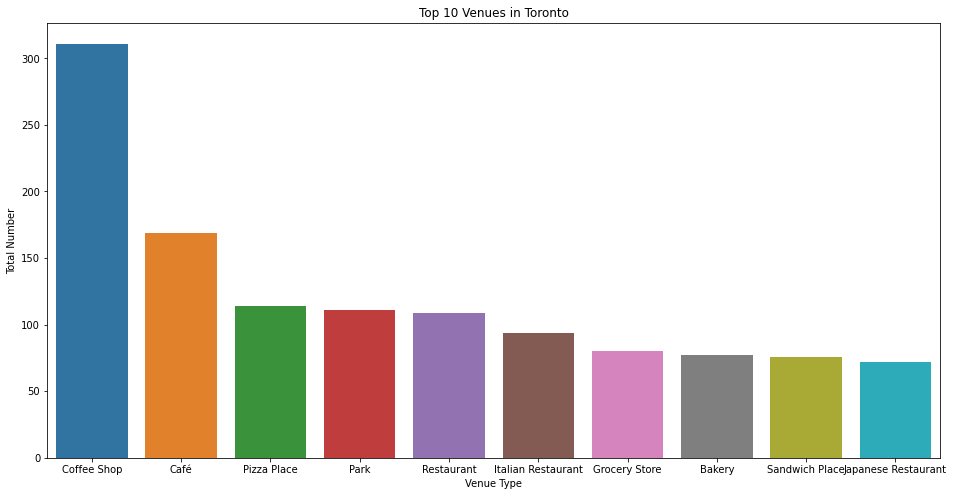

In [42]:
plt.figure(figsize=(16,8))
sns.barplot(x='Venue Category', y='Neighborhood',data=x)
plt.xlabel('Venue Type')
plt.ylabel('Total Number')
plt.title('Top 10 Venues in Toronto')

In [43]:
print(' {} unique categories'.format(len(toronto_venues['Venue Category'].unique())))

 329 unique categories


# Converting the venues into 0/1 values to apply KMeans unsupervised machine learning to cluster venues based on their characteristics

In [44]:
toronto_onehot=pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood']=toronto_venues['Neighborhood']

fixed_columns=[toronto_onehot.columns[-1]]+list(toronto_onehot.columns[:-1])
toronto_onehot=toronto_onehot[fixed_columns]

toronto_onehot.head()

Yoga Studio  ATM  Accessories Store  Afghan Restaurant  Airport  \
0            0    0                  0                  0        0   
1            0    0                  0                  0        0   
2            0    0                  0                  0        0   
3            0    0                  0                  0        0   
4            0    0                  0                  0        0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0                   0             0               0                0   
1                   0             0               0                0   
2                   0             0               0                0   
3                   0             0               0                0   
4                   0             0               0                0   

   Airport Terminal  ...  Vegetarian / Vegan Restaurant  Video Game Store  \
0                 0  ...                              0                 0   
1                 0  ...                              0                 0   
2                 0  ...                              0                 0   
3                 0  ...                              0                 0   
4                 0  ...                              0                 0   

   Video Store  Vietnamese Restaurant  Warehouse Store  Whisky Bar  Wine Bar  \
0            0                      0                0           0         0   
1            0                      0                0           0         0   
2            0                      0                0           0         0   
3            0                      0                0           0         0   
4            0                      0                0           0         0   

   Wine Shop  Wings Joint  Women's Store  
0          0            0              0  
1          0            0              0  
2          0            0              0  
3          0            0              0  
4          0            0              0  

[5 rows x 329 columns]

In [45]:
toronto_onehot.shape

(3923, 329)

In [46]:
#add the column for neighbourhood
toronto_grouped=toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Yoga Studio  ATM  \
0                                         Agincourt          0.0  0.0   
1                            Alderwood, Long Branch          0.0  0.0   
2   Bathurst Manor, Wilson Heights, Downsview North          0.0  0.0   
3                                   Bayview Village          0.0  0.0   
4                 Bedford Park, Lawrence Manor East          0.0  0.0   
..                                              ...          ...  ...   
92                      Willowdale, Willowdale West          0.0  0.0   
93                                           Woburn          0.0  0.0   
94                                 Woodbine Heights          0.0  0.0   
95                                  York Mills West          0.0  0.0   
96                         York Mills, Silver Hills          0.0  0.0   

    Accessories Store  Afghan Restaurant  Airport  Airport Food Court  \
0                 0.0                0.0      0.0                 0.0   
1                 0.0                0.0      0.0                 0.0   
2                 0.0                0.0      0.0                 0.0   
3                 0.0                0.0      0.0                 0.0   
4                 0.0                0.0      0.0                 0.0   
..                ...                ...      ...                 ...   
92                0.0                0.0      0.0                 0.0   
93                0.0                0.0      0.0                 0.0   
94                0.0                0.0      0.0                 0.0   
95                0.0                0.0      0.0                 0.0   
96                0.0                0.0      0.0                 0.0   

    Airport Gate  Airport Lounge  Airport Service  ...  \
0            0.0             0.0              0.0  ...   
1            0.0             0.0              0.0  ...   
2            0.0             0.0              0.0  ...   
3            0.0             0.0              0.0  ...   
4            0.0             0.0              0.0  ...   
..           ...             ...              ...  ...   
92           0.0             0.0              0.0  ...   
93           0.0             0.0              0.0  ...   
94           0.0             0.0              0.0  ...   
95           0.0             0.0              0.0  ...   
96           0.0             0.0              0.0  ...   

    Vegetarian / Vegan Restaurant  Video Game Store  Video Store  \
0                             0.0               0.0        0.000   
1                             0.0               0.0        0.000   
2                             0.0               0.0        0.000   
3                             0.0               0.0        0.000   
4                             0.0               0.0        0.025   
..                            ...               ...          ...   
92                            0.0               0.0        0.000   
93                            0.0               0.0        0.000   
94                            0.0               0.0        0.000   
95                            0.0               0.0        0.000   
96                            0.0               0.0        0.000   

    Vietnamese Restaurant  Warehouse Store  Whisky Bar  Wine Bar  Wine Shop  \
0                     0.0              0.0         0.0       0.0        0.0   
1                     0.0              0.0         0.0       0.0        0.0   
2                     0.0              0.0         0.0       0.0        0.0   
3                     0.0              0.0         0.0       0.0        0.0   
4                     0.0              0.0         0.0       0.0        0.0   
..                    ...              ...         ...       ...        ...   
92                    0.0              0.0         0.0       0.0        0.0   
93                    0.0              0.0         0.0       0.0        0.0   
94                    0.0              0.0         0.0      

In [47]:
toronto_grouped.shape

(97, 329)

# Lets create a data frame for each neighbourhood that contains the top ten venues. This is done because we have a lot of venues

In [48]:
top_venues=10

for hood in toronto_grouped['Neighborhood']:
    print('----'+hood+'----')
    temp=toronto_grouped[toronto_grouped['Neighborhood']==hood].T.reset_index()
    temp.columns=['venue','freq']
    temp=temp.iloc[1:]
    temp['freq']=temp['freq'].astype(float)
    temp=temp.round({'freq':2})
    print(temp.sort_values('freq',ascending=False).reset_index(drop=True).head(top_venues))
    print('\n')

----Agincourt----
                      venue  freq
0        Chinese Restaurant  0.12
1                 Pool Hall  0.06
2            Breakfast Spot  0.06
3  Mediterranean Restaurant  0.06
4               Supermarket  0.06
5          Sushi Restaurant  0.06
6          Malay Restaurant  0.06
7                    Lounge  0.06
8              Skating Rink  0.06
9             Shopping Mall  0.06


----Alderwood, Long Branch----
               venue  freq
0        Pizza Place  0.15
1  Convenience Store  0.15
2                Pub  0.08
3                Gym  0.08
4     Discount Store  0.08
5     Sandwich Place  0.08
6         Donut Shop  0.08
7       Skating Rink  0.08
8               Park  0.08
9        Gas Station  0.08


----Bathurst Manor, Wilson Heights, Downsview North----
                      venue  freq
0                      Bank  0.07
1               Pizza Place  0.07
2               Coffee Shop  0.07
3                      Park  0.07
4               Bridal Shop  0.03
5        Frozen 

In [49]:
def return_top_venues(row,top_venues):
    row_categories=row.iloc[1:]
    row_categories_sorted=row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [50]:
import numpy as np

top_venues=10

indicators=['st','nd','rd']

columns=['Neighborhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most common venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th most common venue'.format(ind+1))

neighborhoods_venues_sorted=pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood']=toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind,1:]=return_top_venues(toronto_grouped.iloc[ind,:],top_venues)
    
neighborhoods_venues_sorted.head()

Neighborhood 1st Most common venue  \
0                                        Agincourt    Chinese Restaurant   
1                           Alderwood, Long Branch           Pizza Place   
2  Bathurst Manor, Wilson Heights, Downsview North           Coffee Shop   
3                                  Bayview Village   Japanese Restaurant   
4                Bedford Park, Lawrence Manor East           Coffee Shop   

  2nd Most common venue 3rd Most common venue 4th most common venue  \
0      Malay Restaurant        Sandwich Place                Lounge   
1     Convenience Store           Coffee Shop                  Park   
2                  Bank           Pizza Place                  Park   
3                  Bank    Chinese Restaurant          Skating Rink   
4    Italian Restaurant           Pizza Place        Sandwich Place   

  5th most common venue      6th most common venue 7th most common venue  \
0        Breakfast Spot  Latin American Restaurant          Skating Rink   
1            Donut Shop             Discount Store          Skating Rink   
2           Supermarket                Bridal Shop         Shopping Mall   
3          Intersection              Grocery Store                  Café   
4                  Park           Sushi Restaurant            Bagel Shop   

  8th most common venue 9th most common venue 10th most common venue  
0           Supermarket      Sushi Restaurant          Shopping Mall  
1           Gas Station        Sandwich Place                    Gym  
2        Sandwich Place            Restaurant     Chinese Restaurant  
3         Shopping Mall                  Park                Dog Run  
4               Butcher            Baby Store            Bridal Shop

# Now it's time to apply KMeans machine learning to cluster venues

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
neighborhoods_venues_sorted.shape


(97, 11)

In [52]:
mms=MinMaxScaler()
toronto_grouped_clustering=toronto_grouped.drop('Neighborhood',1)
mms.fit(toronto_grouped_clustering)
data_transformed=mms.transform(toronto_grouped_clustering)

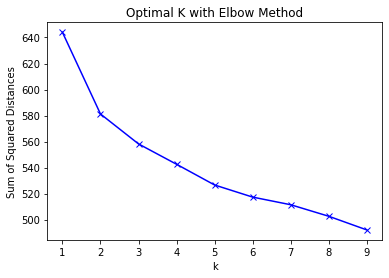

In [53]:
#this is the elbow method to find optimal k value. K value will represent the number of clusters.
#K value is selected at the elbow after which SSD decrease linearly. 
SSdistances=[]
K=range(1,10)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(data_transformed)
    SSdistances.append(km.inertia_)

plt.plot(K, SSdistances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Optimal K with Elbow Method')
plt.show()

In [54]:
#The optimal k is 3. 
k_clusters=3
kmeans=KMeans(n_clusters=k_clusters, random_state=0).fit(toronto_grouped_clustering)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

In [55]:
neighborhoods_venues_sorted.insert(0, 'Cluster Lables', kmeans.labels_)

In [56]:
toronto_merged=df
toronto_merged.head()

Postal Code           Borough                                Neighbourhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494

In [57]:
neighborhoods_venues_sorted.head()

Cluster Lables                                     Neighborhood  \
0               0                                        Agincourt   
1               0                           Alderwood, Long Branch   
2               0  Bathurst Manor, Wilson Heights, Downsview North   
3               0                                  Bayview Village   
4               0                Bedford Park, Lawrence Manor East   

  1st Most common venue 2nd Most common venue 3rd Most common venue  \
0    Chinese Restaurant      Malay Restaurant        Sandwich Place   
1           Pizza Place     Convenience Store           Coffee Shop   
2           Coffee Shop                  Bank           Pizza Place   
3   Japanese Restaurant                  Bank    Chinese Restaurant   
4           Coffee Shop    Italian Restaurant           Pizza Place   

  4th most common venue 5th most common venue      6th most common venue  \
0                Lounge        Breakfast Spot  Latin American Restaurant   
1                  Park            Donut Shop             Discount Store   
2                  Park           Supermarket                Bridal Shop   
3          Skating Rink          Intersection              Grocery Store   
4        Sandwich Place                  Park           Sushi Restaurant   

  7th most common venue 8th most common venue 9th most common venue  \
0          Skating Rink           Supermarket      Sushi Restaurant   
1          Skating Rink           Gas Station        Sandwich Place   
2         Shopping Mall        Sandwich Place            Restaurant   
3                  Café         Shopping Mall                  Park   
4            Bagel Shop               Butcher            Baby Store   

  10th most common venue  
0          Shopping Mall  
1                    Gym  
2     Chinese Restaurant  
3                Dog Run  
4            Bridal Shop

In [58]:
toronto_merged=toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

In [59]:
toronto_merged=toronto_merged.rename(columns={'Cluster Lables':'Cluster Labels'})
toronto_merged.head()

Postal Code           Borough                                Neighbourhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Latitude  Longitude  Cluster Labels   1st Most common venue  \
0  43.753259 -79.329656             0.0                Bus Stop   
1  43.725882 -79.315572             0.0             Pizza Place   
2  43.654260 -79.360636             0.0             Coffee Shop   
3  43.718518 -79.464763             0.0  Furniture / Home Store   
4  43.662301 -79.389494             0.0             Coffee Shop   

   2nd Most common venue  3rd Most common venue 4th most common venue  \
0                   Road                   Park     Food & Drink Shop   
1  Portuguese Restaurant            Coffee Shop          Intersection   
2                   Park             Restaurant                  Café   
3         Clothing Store  Vietnamese Restaurant    Seafood Restaurant   
4                   Café        Bubble Tea Shop             Gastropub   

  5th most common venue 6th most common venue 7th most common venue  \
0    Dim Sum Restaurant                 Diner        Discount Store   
1   Sporting Goods Shop          Hockey Arena                  Park   
2               Theater                Bakery                   Pub   
3           Coffee Shop  Fast Food Restaurant          Dessert Shop   
4               Gay Bar             Bookstore           Yoga Studio   

  8th most common venue 9th most common venue 10th most common venue  
0   Distribution Center              Dive Bar                Dog Run  
1         Women's Store      Doner Restaurant     Dim Sum Restaurant  
2       Thai Restaurant    Italian Restaurant         Cosmetics Shop  
3   Fried Chicken Joint           Flea Market    Rental Car Location  
4                  Park      Sushi Restaurant     Chinese Restaurant

In [60]:
mtm=toronto_merged
mtm=mtm.dropna(axis=0)
#print(mtm.isnull().sum())
mtm['Cluster Labels']=mtm['Cluster Labels'].astype(int)


<ipython-input-60-81d8b63a162e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtm['Cluster Labels']=mtm['Cluster Labels'].astype(int)


# Lets take a look at the clustered venues now. 

In [61]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters=folium.Map(location=[43.6534817,-79.3839347], zoom_start=10)

#setting color scheme for clusters
x=np.arange(k_clusters)
ys=[i+x+(i*x)**2 for i in range(k_clusters)]
colors_array=cm.rainbow(np.linspace(0,1,len(ys)))
rainbow=[colors.rgb2hex(i) for i in colors_array]

#adding markers to the map
markers_colors=[]
for lat, lon, poi, cluster in zip(mtm['Latitude'], mtm['Longitude'], mtm['Neighbourhood'], mtm['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# This is to take a look at each unique cluster starting from 0 to 2. total number of clusters is 3.

In [62]:
pd.set_option('max_rows',100)
cl1=mtm.loc[mtm['Cluster Labels']==0, mtm.columns[[1]+list(range(5,mtm.shape[1]))]]


In [63]:
cl2=mtm.loc[mtm['Cluster Labels']==1, mtm.columns[[1]+list(range(5,mtm.shape[1]))]]
cl3=mtm.loc[mtm['Cluster Labels']==2, mtm.columns[[1]+list(range(5,mtm.shape[1]))]]



In [64]:
cl1.head()

Borough  Cluster Labels   1st Most common venue  \
0        North York               0                Bus Stop   
1        North York               0             Pizza Place   
2  Downtown Toronto               0             Coffee Shop   
3        North York               0  Furniture / Home Store   
4  Downtown Toronto               0             Coffee Shop   

   2nd Most common venue  3rd Most common venue 4th most common venue  \
0                   Road                   Park     Food & Drink Shop   
1  Portuguese Restaurant            Coffee Shop          Intersection   
2                   Park             Restaurant                  Café   
3         Clothing Store  Vietnamese Restaurant    Seafood Restaurant   
4                   Café        Bubble Tea Shop             Gastropub   

  5th most common venue 6th most common venue 7th most common venue  \
0    Dim Sum Restaurant                 Diner        Discount Store   
1   Sporting Goods Shop          Hockey Arena                  Park   
2               Theater                Bakery                   Pub   
3           Coffee Shop  Fast Food Restaurant          Dessert Shop   
4               Gay Bar             Bookstore           Yoga Studio   

  8th most common venue 9th most common venue 10th most common venue  
0   Distribution Center              Dive Bar                Dog Run  
1         Women's Store      Doner Restaurant     Dim Sum Restaurant  
2       Thai Restaurant    Italian Restaurant         Cosmetics Shop  
3   Fried Chicken Joint           Flea Market    Rental Car Location  
4                  Park      Sushi Restaurant     Chinese Restaurant

# Let's take a look at the different venues in each cluster 

In [65]:
tvenues=np.zeros((kmeans.cluster_centers_.shape))
tvenues[0,:]=kmeans.cluster_centers_[0,:]
tvenues[1,:]=kmeans.cluster_centers_[1,:]
tvenues[2,:]=kmeans.cluster_centers_[2,:]

gmax=[]

for i in range(3):
    gmax.extend(tvenues[i,:].argsort()[-3:][::1])

args=np.asarray(list(set(gmax)))
table=pd.DataFrame(data=tvenues[:,args.astype(int)], index=['CI','CII','CIII'],columns=toronto_grouped_clustering.columns[args.astype(int)])


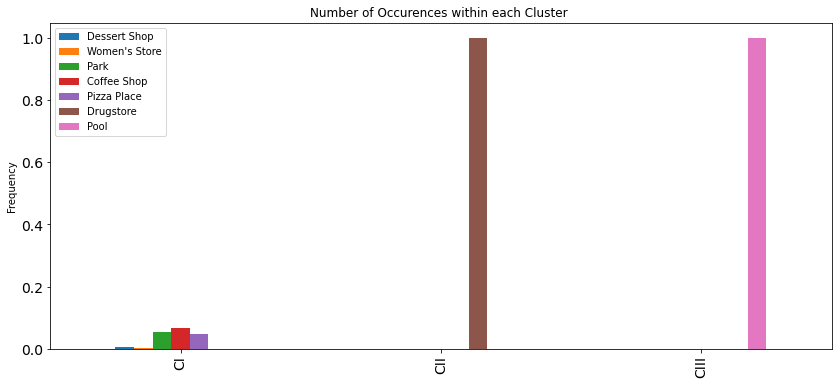

In [66]:
ax=table.plot(kind='bar', figsize=(14,6), rot=90, fontsize=14 )
bars=ax.get_children()
plt.title('Number of Occurences within each Cluster ')
plt.ylabel('Frequency')
plt.show()

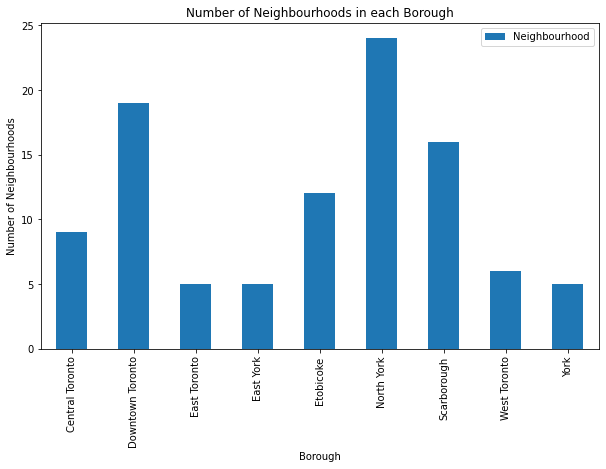

In [67]:
mtm.groupby('Borough')['Neighbourhood'].count().plot(kind='bar', figsize=(10,6))
plt.title('Number of Neighbourhoods in each Borough')
plt.ylabel('Number of Neighbourhoods')
plt.xlabel('Borough')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Neighbourhood Breakdown')

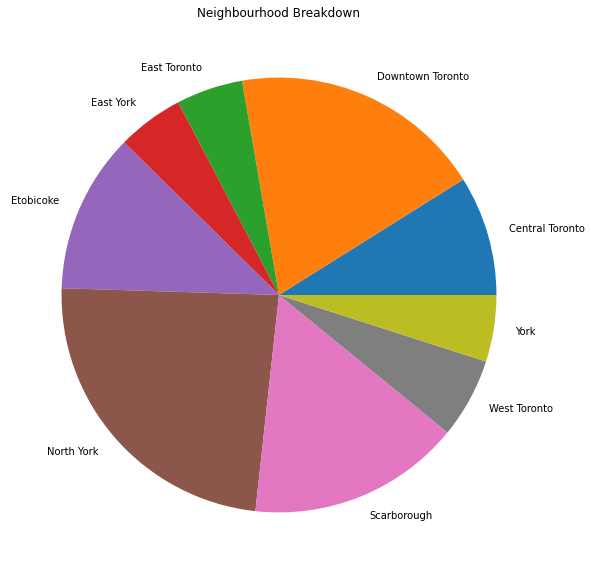

In [68]:
mtm.groupby('Borough')['Neighbourhood'].count().plot(kind='pie', figsize=(20,10), legend='')
plt.xlabel('')
plt.ylabel('')
plt.title('Neighbourhood Breakdown')


In [69]:
#this will involve data cleaning, formatting, and so on. We want to take a look at the crimes for the year 2019.
tp=pd.read_csv('//Users/Saifullah/Desktop/IBM DS/csv files/Tc.csv')
tp.drop(['X','Y','Index_','event_unique_id','ucr_code','ucr_ext','Division','ObjectId','Hood_ID'], axis=1, inplace=True)

tpc=tp[['Neighbourhood','MCI','Long','Lat','reporteddayofweek','reportedyear','reportedday','premisetype','occurrencemonth']]

tpc=tpc[tpc['reportedyear']==2019]
tpc.rename(columns={'MCI':'Offense type', 'reporteddayofweek':'Crime day'}, inplace=True)
tpc.drop(['reportedday'],axis=1, inplace=True)

In [70]:
tor=os.path.join('/Users/Saifullah/Desktop/IBM DS/CAPSTONE PROJECT/','simple.geojson')
tpc['Offense type'].value_counts()

Assault            20426
Break and Enter     8386
Auto Theft          5186
Robbery             3417
Theft Over          1355
Name: Offense type, dtype: int64

In [71]:
#this is to obtain different data frames containing the unique types of crimes.
tpc_assault=tpc[tpc['Offense type']=='Assault']
tpc_BandE=tpc[tpc['Offense type']=='Break and Enter']
tpc_Atheft=tpc[tpc['Offense type']=='Auto Theft']
tpc_robbery=tpc[tpc['Offense type']=='Robbery']
tpc_theftO=tpc[tpc['Offense type']=='Theft Over']

th=pd.read_csv('//Users/Saifullah/Desktop/IBM DS/csv files/Homicide.csv')
th=th[['Occurrence_year','Neighbourhood','Lat','Long','Homicide_Type']]
th=th[th['Occurrence_year']==2019]
th=th[th['Homicide_Type']!='Other']
th.head()

Occurrence_year              Neighbourhood        Lat       Long  \
1015             2019         Kennedy Park (124)  43.727463 -79.252602   
1016             2019        Rexdale-Kipling (4)  43.722855 -79.559936   
1017             2019  Clairlea-Birchmount (120)  43.710480 -79.271584   
1018             2019          Dorset Park (126)  43.769581 -79.287247   
1019             2019    Rockcliffe-Smythe (111)  43.670605 -79.488075   

     Homicide_Type  
1015      Stabbing  
1016      Shooting  
1017      Stabbing  
1018      Shooting  
1019      Stabbing

In [72]:
th_shooting=th[th['Homicide_Type']=='Shooting']
th_stabbing=th[th['Homicide_Type']=='Stabbing']

# Plotting homicide cime as markers to visualize

In [73]:
thm=folium.Map(location=[43.6534817,-79.3839347], zoom_start=10,tiles='CartoDB dark_matter')

for lat, lng, Offense, neighborhood in zip(th_shooting['Lat'], th_shooting['Long'], th_shooting['Homicide_Type'], th_shooting['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, Offense)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='black',
        fill_opacity=0.7,
        parse_html=False
  ).add_to(thm)  
    
for lat, lng, Offense, neighborhood in zip(th_stabbing['Lat'], th_stabbing['Long'], th_stabbing['Homicide_Type'], th_stabbing['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, Offense)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='black',
        fill_opacity=0.7,
        parse_html=False
  ).add_to(thm)  
    
thm



In [74]:
tpc=tpc[tpc['premisetype']!='Other']

th.rename(columns={'Homicide_Type':'Offense type'}, inplace=True)

tf=pd.concat([tpc,th],ignore_index=True,sort=False)

tf.head()

Neighbourhood     Offense type       Long        Lat  \
0                    Malvern (132)          Assault -79.227135  43.810932   
1       Church-Yonge Corridor (75)          Assault -79.384155  43.663906   
2       Church-Yonge Corridor (75)          Assault -79.380676  43.655777   
3        Bedford Park-Nortown (39)          Assault -79.415932  43.723015   
4  Islington-City Centre West (14)  Break and Enter -79.528748  43.648773   

    Crime day  reportedyear premisetype occurrencemonth  Occurrence_year  
0  Wednesday         2019.0     Outside           March              NaN  
1  Thursday          2019.0     Outside        February              NaN  
2  Thursday          2019.0  Commercial        February              NaN  
3  Friday            2019.0   Apartment            June              NaN  
4  Tuesday           2019.0  Commercial        February              NaN

In [75]:
tf['Occurrence_year'].fillna(2019, inplace=True)
tf['Occurrence_year']=tf['Occurrence_year'].astype(int)


#let's calculate the total number of crimes. This is done to be able to to visualize the crimes in a choropleth map later.
total_crime=pd.DataFrame(tf['Neighbourhood'].value_counts().astype(int))
total_crime=total_crime.reset_index()
total_crime.columns=['Neighbourhood','Number of crimes']
total_crime.tail(10)

Neighbourhood  Number of crimes
130      Etobicoke West Mall (13)                78
131                Alderwood (20)                76
132  Humber Heights-Westmount (8)                75
133               Maple Leaf (29)                75
134     Lawrence Park North (105)                74
135            Markland Wood (12)                63
136            Old East York (58)                62
137      Lambton Baby Point (114)                57
138         Woodbine-Lumsden (60)                50
139               Guildwood (140)                41

In [76]:
import urllib.request
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
url='https://raw.githubusercontent.com/jasonicarter/toronto-geojson/master/toronto_crs84.geojson'
filename='toronto_crs84.geojson'
urllib.request.urlretrieve(url, filename)


file=open('toronto_crs84.geojson','rt')
geo_file_tor=json.load(file)



# Choropleth map of crimes in toronto

In [135]:


total_crime_map=folium.Map(location=[43.6534817,-79.3839347], tiles='CartoDB positron')
total_crime_map.choropleth(
geo_data=geo_file_tor, data=total_crime, columns=['Neighbourhood','Number of crimes'], key_on='feature.properties.AREA_NAME',
zoom_start=10, fill_color='YlOrRd',fill_opacity=0.7, line_opacity=0.2, legend_name='Crimes in Toronto')

total_crime_map


# lets take a look at the different venues and the number of crimes in their respective locations

In [136]:
total_crime_map=folium.Map(location=[43.6534817,-79.3839347], tiles='CartoDB positron')
total_crime_map.choropleth(
geo_data=geo_file_tor, data=total_crime, columns=['Neighbourhood','Number of crimes'], 
    key_on='feature.properties.AREA_NAME',
    zoom_start=10, 
    fill_color='YlOrRd',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crimes in Toronto'
   )

x=np.arange(k_clusters)
ys=[i+x+(i*x)**2 for i in range(k_clusters)]
colors_array=cm.rainbow(np.linspace(0,1,len(ys)))
rainbow=[colors.hex2color(i) for i in colors_array]

#rgb2hex

markers_colors=[]
for lat, lon, poi, cluster in zip(mtm['Latitude'], mtm['Longitude'], mtm['Neighbourhood'], mtm['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
       # rainbow[cluster-1],
        fill_opacity=0.7).add_to(total_crime_map)
  
total_crime_map

In [79]:
tpc.isnull().sum()
#check null value.s 

Neighbourhood      0
Offense type       0
Long               0
Lat                0
Crime day          0
reportedyear       0
premisetype        0
occurrencemonth    9
dtype: int64

In [80]:
#lets drop null from occurencemonth
tpc=tpc[tpc['occurrencemonth'].notna()]

In [81]:
tpc.isnull().sum()

Neighbourhood      0
Offense type       0
Long               0
Lat                0
Crime day          0
reportedyear       0
premisetype        0
occurrencemonth    0
dtype: int64

# Crime statistics and analysis

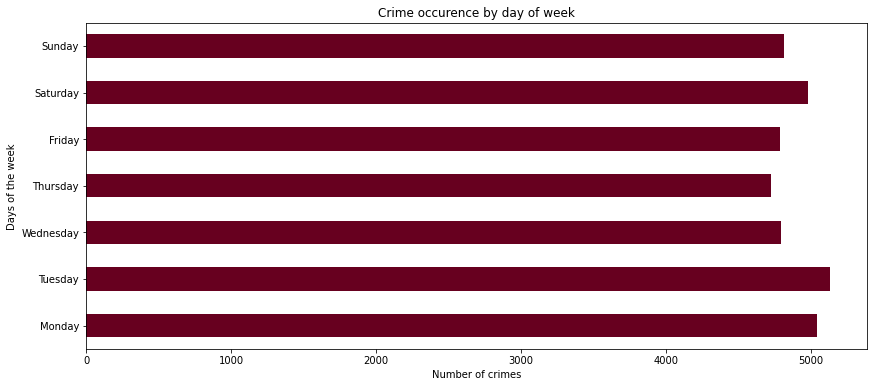

In [82]:
tf.groupby('Crime day')['Offense type'].count().plot(kind='barh',figsize=(14,6), colormap='RdBu')
days=['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.ylabel('Days of the week')
plt.xlabel('Number of crimes')
plt.title('Crime occurence by day of week')
plt.yticks(np.arange(7), days)
plt.show()



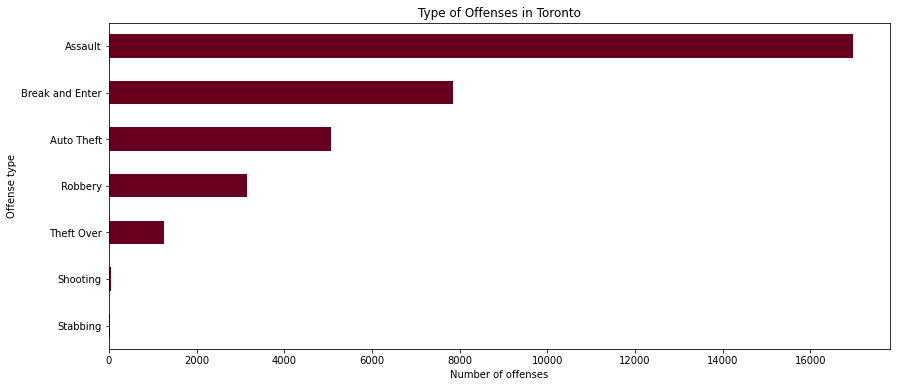

In [83]:
tf.groupby([tf['Offense type']]).size().sort_values(ascending=True).plot(kind='barh',figsize=(14,6),colormap='RdBu')
plt.title('Type of Offenses in Toronto')
plt.ylabel('Offense type')
plt.xlabel('Number of offenses')
plt.show()

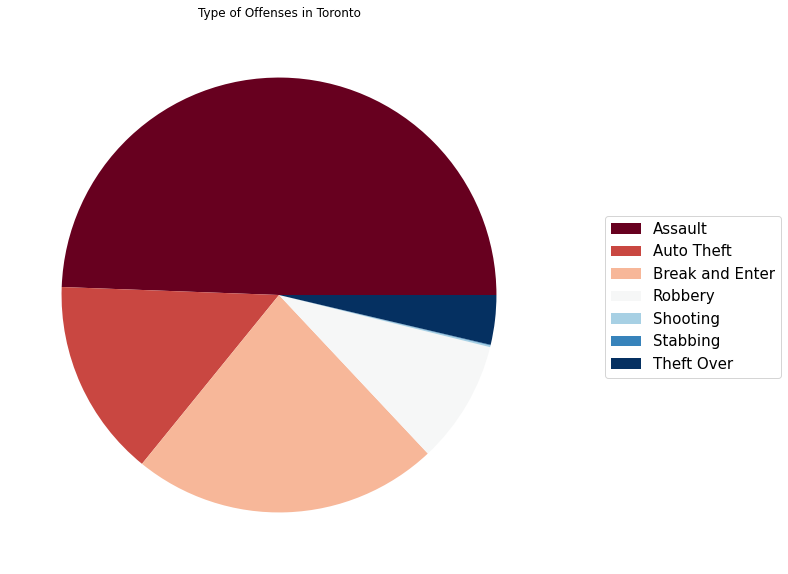

In [84]:
tf.groupby([tf['Offense type']]).size().plot(kind='pie',figsize=(20,10),colormap='RdBu',labels=None
                                                                        )
                                                                                                                    
plt.title('Type of Offenses in Toronto')
plt.ylabel('')
labels=['Assault','Auto Theft','Break and Enter','Robbery','Shooting','Stabbing','Theft Over']
plt.legend(labels, bbox_to_anchor=(0.8,0.5), loc="center", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)
plt.show()

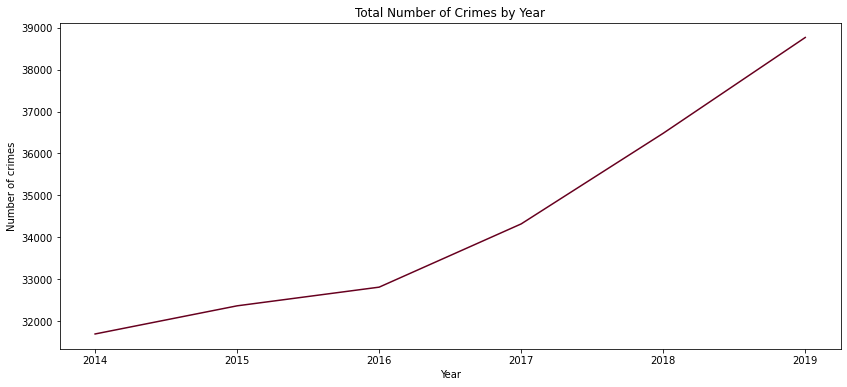

In [85]:
tp.groupby('reportedyear')['reportedyear'].count().plot(figsize=(14,6),legend=False, colormap='RdBu')
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.title('Total Number of Crimes by Year')
plt.show()

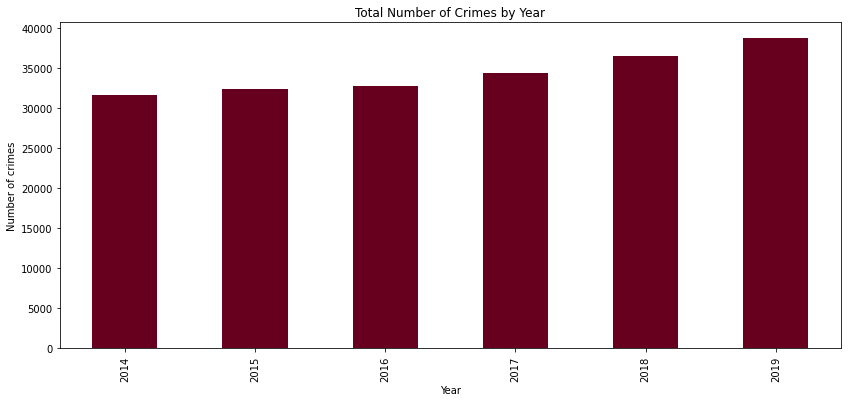

In [86]:
tp.groupby('reportedyear')['reportedyear'].count().plot(kind='bar',figsize=(14,6),legend=False, colormap='RdBu')
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.title('Total Number of Crimes by Year')
plt.show()

In [87]:
tp.isnull().sum()


occurrencedate          0
reporteddate            0
premisetype             0
offence                 0
reportedyear            0
reportedmonth           0
reportedday             0
reporteddayofyear       0
reporteddayofweek       0
reportedhour            0
occurrenceyear         59
occurrencemonth        59
occurrenceday          59
occurrencedayofyear    59
occurrencedayofweek    59
occurrencehour          0
MCI                     0
Neighbourhood           0
Long                    0
Lat                     0
dtype: int64

In [88]:
tp=tp[tp['occurrenceyear'].notna()]


In [89]:
tp.isnull().sum()

occurrencedate         0
reporteddate           0
premisetype            0
offence                0
reportedyear           0
reportedmonth          0
reportedday            0
reporteddayofyear      0
reporteddayofweek      0
reportedhour           0
occurrenceyear         0
occurrencemonth        0
occurrenceday          0
occurrencedayofyear    0
occurrencedayofweek    0
occurrencehour         0
MCI                    0
Neighbourhood          0
Long                   0
Lat                    0
dtype: int64

In [90]:
tp.head()


occurrencedate            reporteddate premisetype  \
0  2014/03/24 00:00:00+00  2014/03/24 00:00:00+00  Commercial   
1  2014/09/27 00:00:00+00  2014/09/29 00:00:00+00       Other   
2  2014/03/24 00:00:00+00  2014/03/24 00:00:00+00  Commercial   
3  2014/03/24 00:00:00+00  2014/03/24 00:00:00+00   Apartment   
4  2014/05/03 00:00:00+00  2014/05/03 00:00:00+00  Commercial   

              offence  reportedyear reportedmonth  reportedday  \
0             Assault          2014         March           24   
1                 B&E          2014     September           29   
2                 B&E          2014         March           24   
3                 B&E          2014         March           24   
4  Robbery - Business          2014           May            3   

   reporteddayofyear reporteddayofweek  reportedhour  occurrenceyear  \
0                 83        Monday                 3          2014.0   
1                272        Monday                10          2014.0   
2                 83        Monday                 7          2014.0   
3                 83        Monday                23          2014.0   
4                123        Saturday               2          2014.0   

  occurrencemonth  occurrenceday  occurrencedayofyear occurrencedayofweek  \
0           March           24.0                 83.0          Monday       
1       September           27.0                270.0          Saturday     
2           March           24.0                 83.0          Monday       
3           March           24.0                 83.0          Monday       
4             May            3.0                123.0          Saturday     

   occurrencehour              MCI               Neighbourhood       Long  \
0               1          Assault               Malvern (132) -79.199081   
1              16  Break and Enter    Bay Street Corridor (76) -79.386383   
2               6  Break and Enter  West Humber-Clairville (1) -79.612595   
3              15  Break and Enter     Don Valley Village (47) -79.349121   
4               2          Robbery          Junction Area (90) -79.458778   

         Lat  
0  43.800281  
1  43.662472  
2  43.720406  
3  43.782772  
4  43.664490

In [91]:
tp['premisetype'].value_counts()

Outside       54251
Apartment     49973
Commercial    41078
House         37900
Other         23174
Name: premisetype, dtype: int64

In [92]:
tf.head()

Neighbourhood     Offense type       Long        Lat  \
0                    Malvern (132)          Assault -79.227135  43.810932   
1       Church-Yonge Corridor (75)          Assault -79.384155  43.663906   
2       Church-Yonge Corridor (75)          Assault -79.380676  43.655777   
3        Bedford Park-Nortown (39)          Assault -79.415932  43.723015   
4  Islington-City Centre West (14)  Break and Enter -79.528748  43.648773   

    Crime day  reportedyear premisetype occurrencemonth  Occurrence_year  
0  Wednesday         2019.0     Outside           March             2019  
1  Thursday          2019.0     Outside        February             2019  
2  Thursday          2019.0  Commercial        February             2019  
3  Friday            2019.0   Apartment            June             2019  
4  Tuesday           2019.0  Commercial        February             2019

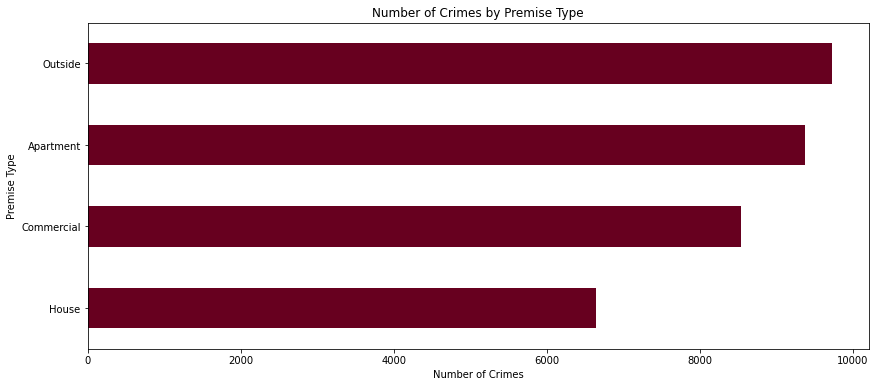

In [93]:
tf.groupby('premisetype')['Offense type'].count().sort_values(ascending=True).plot(kind='barh', figsize=(14,6), colormap='RdBu')
plt.title('Number of Crimes by Premise Type')
plt.ylabel('Premise Type')
plt.xlabel('Number of Crimes')
plt.show()

In [94]:
tpa=tp[tp['occurrenceyear']==2019]
tpa.head()

occurrencedate            reporteddate premisetype  \
131006  2019/03/20 00:00:00+00  2019/03/20 00:00:00+00     Outside   
131007  2019/02/28 00:00:00+00  2019/02/28 00:00:00+00     Outside   
131014  2019/02/28 00:00:00+00  2019/02/28 00:00:00+00  Commercial   
131020  2019/06/14 00:00:00+00  2019/06/14 00:00:00+00   Apartment   
131027  2019/02/16 00:00:00+00  2019/02/19 00:00:00+00  Commercial   

                              offence  reportedyear reportedmonth  \
131006  Discharge Firearm With Intent          2019         March   
131007            Assault With Weapon          2019      February   
131014            Assault With Weapon          2019      February   
131020            Assault With Weapon          2019          June   
131027                            B&E          2019      February   

        reportedday  reporteddayofyear reporteddayofweek  reportedhour  \
131006           20                 79        Wednesday             21   
131007           28                 59        Thursday              13   
131014           28                 59        Thursday              17   
131020           14                165        Friday                 0   
131027           19                 50        Tuesday                9   

        occurrenceyear occurrencemonth  occurrenceday  occurrencedayofyear  \
131006          2019.0           March           20.0                 79.0   
131007          2019.0        February           28.0                 59.0   
131014          2019.0        February           28.0                 59.0   
131020          2019.0            June           14.0                165.0   
131027          2019.0        February           16.0                 47.0   

       occurrencedayofweek  occurrencehour              MCI  \
131006          Wednesday               21          Assault   
131007          Thursday                13          Assault   
131014          Thursday                17          Assault   
131020          Friday                   0          Assault   
131027          Saturday                16  Break and Enter   

                          Neighbourhood       Long        Lat  
131006                    Malvern (132) -79.227135  43.810932  
131007       Church-Yonge Corridor (75) -79.384155  43.663906  
131014       Church-Yonge Corridor (75) -79.380676  43.655777  
131020        Bedford Park-Nortown (39) -79.415932  43.723015  
131027  Islington-City Centre West (14) -79.528748  43.648773

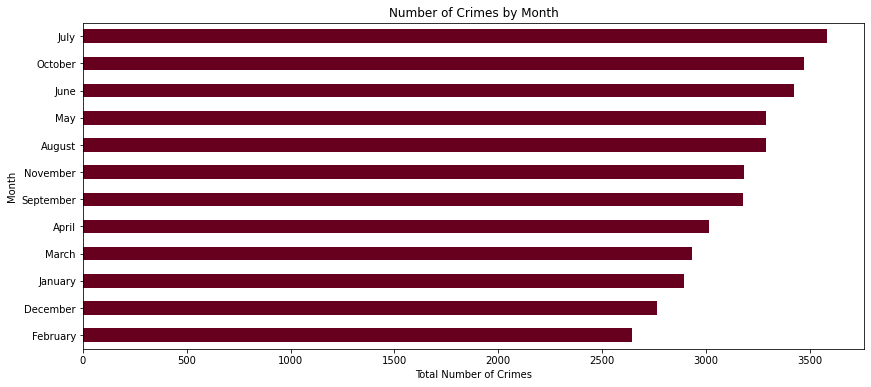

In [95]:
tpa.groupby('occurrencemonth')['offence'].count().sort_values(ascending=True).plot(kind='barh',figsize=(14,6), colormap='RdBu')

plt.title('Number of Crimes by Month')
plt.xlabel('Total Number of Crimes')
plt.ylabel('Month')
plt.show()

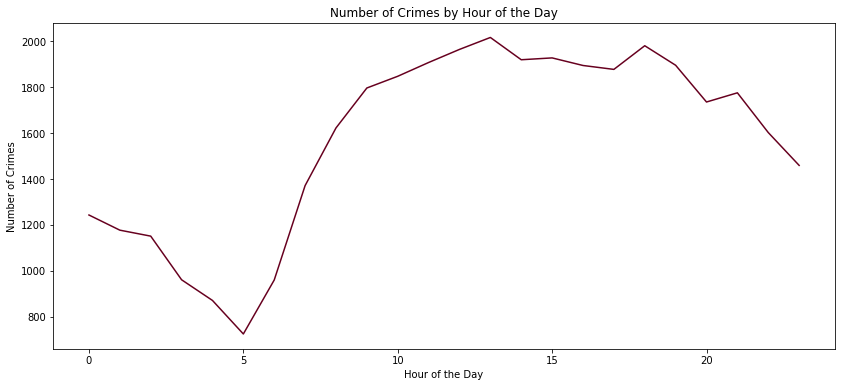

In [96]:
tpa.groupby('reportedhour')['offence'].count().plot(figsize=(14,6), colormap='RdBu')
plt.title('Number of Crimes by Hour of the Day')
plt.ylabel('Number of Crimes')
plt.xlabel('Hour of the Day')
plt.show()

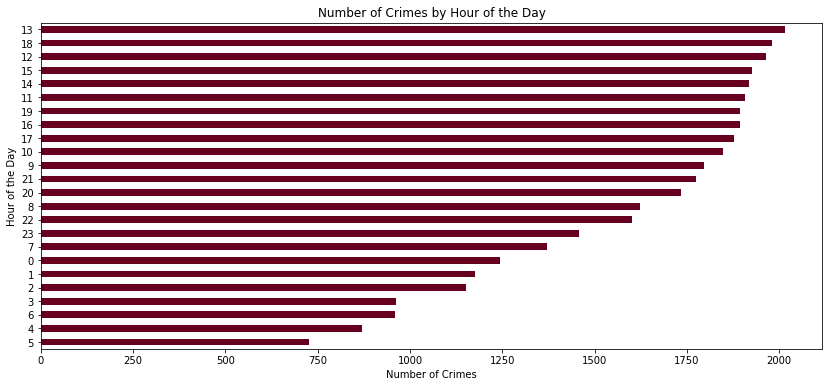

In [97]:
tpa.groupby('reportedhour')['offence'].count().sort_values(ascending=True).plot(kind='barh', figsize=(14,6), colormap='RdBu')
plt.title('Number of Crimes by Hour of the Day')
plt.xlabel('Number of Crimes')
plt.ylabel('Hour of the Day')
plt.show()

In [98]:
tf.head()

Neighbourhood     Offense type       Long        Lat  \
0                    Malvern (132)          Assault -79.227135  43.810932   
1       Church-Yonge Corridor (75)          Assault -79.384155  43.663906   
2       Church-Yonge Corridor (75)          Assault -79.380676  43.655777   
3        Bedford Park-Nortown (39)          Assault -79.415932  43.723015   
4  Islington-City Centre West (14)  Break and Enter -79.528748  43.648773   

    Crime day  reportedyear premisetype occurrencemonth  Occurrence_year  
0  Wednesday         2019.0     Outside           March             2019  
1  Thursday          2019.0     Outside        February             2019  
2  Thursday          2019.0  Commercial        February             2019  
3  Friday            2019.0   Apartment            June             2019  
4  Tuesday           2019.0  Commercial        February             2019

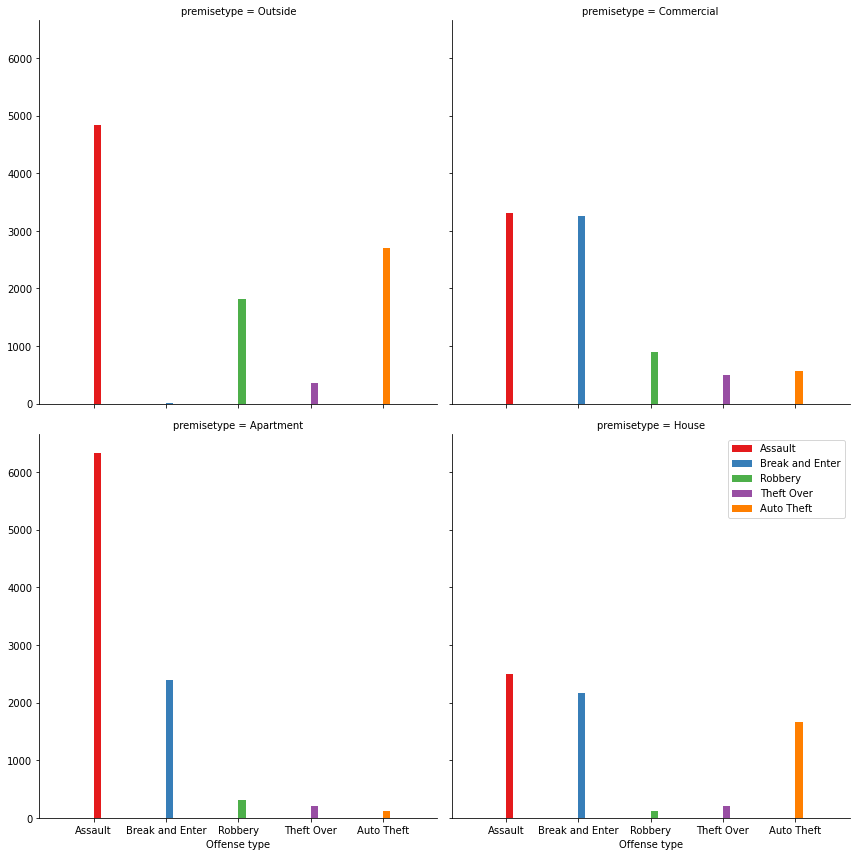

In [99]:
import seaborn as sns

g=sns.FacetGrid(tf, col='premisetype', hue='Offense type',palette='Set1',col_wrap=2, height=6)

g.map(plt.hist,'Offense type')
g.axes[-1].legend()

plt.show()

In [100]:
tf['Neighbourhood'].nunique()

140